In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# configure plotting
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

voc_dir = '../data/pascal-obfuscated/VOC2011'
mean = (104.00699, 116.66877, 122.67892)

In [35]:
def load_image(idx):
    """
    Load input image and preprocess for Caffe:
    - cast to float
    - switch channels RGB -> BGR
    - subtract mean
    - transpose to channel x height x width order
    """
    im = Image.open('{}/JPEGImages/{}.jpg'.format(voc_dir, idx))
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    in_ -= mean
    in_ = in_.transpose((2,0,1))
    return in_

def load_label(idx):
    """
    Load label image as 1 x height x width integer array of label indices.
    The leading singleton dimension is required by the loss.
    """
    im = Image.open('{}/SegmentationClass/{}.png'.format(voc_dir, idx))
    label = np.array(im, dtype=np.uint8)
    label = label[np.newaxis, ...]
    return label

def obfuscate_label(label):
    """
    Obfuscate label image with only two classes: foreground and background
    """
    label[np.all([label != 0, label != 255], axis=0)]=1

    return label

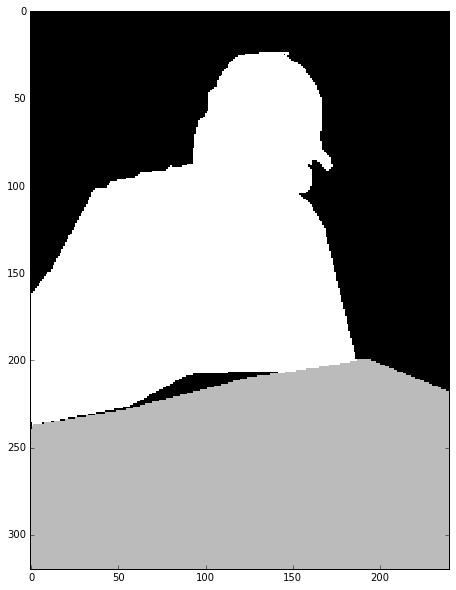

In [42]:
idx = '2007_003742'
label = load_label(idx)
show = label[0,:,:]
show[show==255]=0
plt.imshow(show)

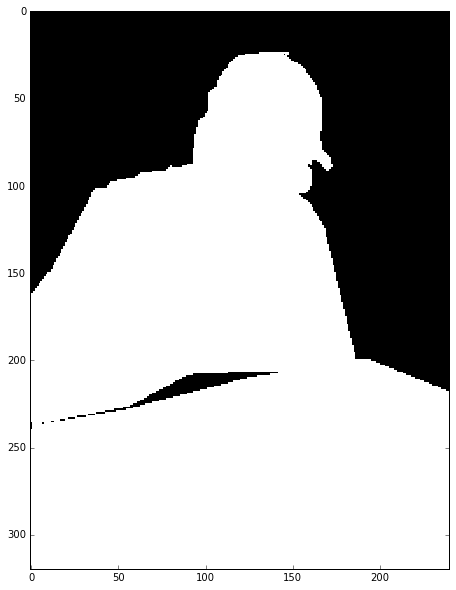

In [43]:
idx = '2007_003742'
label = load_label(idx)
label = obfuscate_label(label)
show = label[0,:,:]
show[show==255]=0
plt.imshow(show)

In [45]:
label = load_label(idx)
label = obfuscate_label(label)
print label
print label.dtype
values = label.flatten()
print min(values), max(values)
print np.histogram(values,bins=255)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [1 1 1 ..., 1 1 1]
  [1 1 1 ..., 1 1 1]
  [1 1 1 ..., 1 1 1]]]
uint8
0 255
(array([25161, 48971,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           